<a href="https://colab.research.google.com/github/anaruizn/Machine-Learning/blob/main/TrabajoFinalComputacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='yellow'>**Tarea computacional #4: Proyecto Machine Learning**</font>

## *Presentado por:*
## <font color='magenta'>**Ana Luz Ruiz Noriega**</font>

In [ ]:
# Instala librerías necesarias
!pip install -q requests

In [ ]:
# Importamos las librerías a utilizar
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

## ⬇️ <font color='blue'>**1. Extraemos los datos:**</font>

Los datos de las variables meteorológicas fueron tomadas de https://open-meteo.com/ donde también se describe cada variable. Para extraer los datos es necesario otorgar parámetros como la ubicación y el rango de tiempo que se desea.

In [ ]:
# Parámetros
latitude = 4.7110     # Ubicación: Bogotá
longitude = -74.0721
start_date = "2005-01-01"  # Rango de tiempo en el que quiero los datos
end_date = "2025-01-01"

# Variables a emplear
variables = [
    "temperature_2m_max", "temperature_2m_mean", "temperature_2m_min", "apparent_temperature_max",
    "apparent_temperature_mean", "apparent_temperature_min", "weather_code","precipitation_sum",
    "rain_sum", "showers_sum", "snowfall_sum", "precipitation_hours", "precipitation_probability_max",
    "precipitation_probability_min", "precipitation_probability_mean", "sunrise", "sunset",
    "sunshine_duration", "daylight_duration", "wind_speed_10m_max", "wind_gusts_10m_max",
    "windspeed_10m_max", "wind_direction_10m_dominant", "shortwave_radiation_sum",
    "et0_fao_evapotranspiration", "uv_index_max", "uv_index_clear_sky_max"
]

# Construcción de URL
url = "https://archive-api.open-meteo.com/v1/archive"
params = {
    "latitude": latitude,
    "longitude": longitude,
    "start_date": start_date,
    "end_date": end_date,
    "daily": ",".join(variables),
    "timezone": "auto"
}

# Solicitud de datos
response = requests.get(url, params=params)
data = response.json()

# Conversión a DataFrame
df = pd.DataFrame(data["daily"])
df["time"] = pd.to_datetime(df["time"])

# Vista previa del df
print("Datos cargados:")
df

Datos cargados:


,time,temperature_2m_max,temperature_2m_mean,temperature_2m_min,apparent_temperature_max,apparent_temperature_mean,apparent_temperature_min,weather_code,precipitation_sum,rain_sum,...,sunshine_duration,daylight_duration,wind_speed_10m_max,wind_gusts_10m_max,windspeed_10m_max,wind_direction_10m_dominant,shortwave_radiation_sum,et0_fao_evapotranspiration,uv_index_max,uv_index_clear_sky_max
0,2005-01-01,19.3,14.8,11.2,19.2,14.2,11.0,53,3.8,3.8,...,38845.50,42669.62,9.0,38.2,9.0,119,19.82,3.56,None,None
1,2005-01-02,20.1,14.8,10.6,19.4,14.4,10.4,51,3.0,3.0,...,40068.76,42673.64,9.5,38.2,9.5,122,19.13,3.48,None,None
2,2005-01-03,19.3,14.8,11.8,18.9,14.6,11.9,61,4.9,4.9,...,38078.46,42677.98,9.0,37.4,9.0,124,17.65,3.21,None,None
3,2005-01-04,19.7,14.8,11.6,19.8,14.5,11.6,53,5.2,5.2,...,38490.85,42682.62,9.5,39.6,9.5,121,18.54,3.36,None,None
4,2005-01-05,19.6,14.9,11.5,18.9,14.5,11.6,55,4.7,4.7,...,38688.86,42687.56,9.8,39.2,9.8,124,18.50,3.33,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7301,2024-12-28,18.5,14.0,10.0,18.9,13.9,9.6,63,10.1,10.1,...,32767.66,42657.61,8.1,21.6,8.1,100,15.13,2.73,None,None
7302,2024-12-29,19.1,13.9,10.0,18.9,13.7,9.7,61,3.3,3.3,...,36194.76,42660.30,8.1,24.8,8.1,218,15.53,2.77,None,None
7303,2024-12-30,18.3,13.6,10.7,18.9,13.6,10.2,63,8.1,8.1,...,29318.12,42663.32,8.7,25.6,8.7,49,15.47,2.72,None,None
7304,2024-12-31,21.4,14.3,9.9,22.7,14.3,9.5,53,1.4,1.4,...,34976.73,42666.65,15.8,33.8,15.8,294,22.26,4.02,None,None


In [ ]:
# Veamos caless códigos de interpretación meteorológica hay en weather_code
df['weather_code'].unique()

array([53, 51, 61, 55, 63,  3,  2,  1, 65])

In [ ]:
# Veamos la información del dataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7306 entries, 0 to 7305
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   time                            7306 non-null   datetime64[ns]
 1   temperature_2m_max              7306 non-null   float64       
 2   temperature_2m_mean             7306 non-null   float64       
 3   temperature_2m_min              7306 non-null   float64       
 4   apparent_temperature_max        7306 non-null   float64       
 5   apparent_temperature_mean       7306 non-null   float64       
 6   apparent_temperature_min        7306 non-null   float64       
 7   weather_code                    7306 non-null   int64         
 8   precipitation_sum               7306 non-null   float64       
 9   rain_sum                        7306 non-null   float64       
 10  showers_sum                     7306 non-null   float64       
 11  snow

## ✍<font color='blue'>**2. Tratamiento de los datos**</font>


In [ ]:
# Quitamos las varibles vacías (0 non-null) y creamos un nuevo df
df_new = df.copy()
df_new = df_new.drop(columns=['precipitation_probability_max', 'precipitation_probability_min', 'precipitation_probability_mean', 'sunrise', 'sunset', 'uv_index_max', 'uv_index_clear_sky_max'])

In [ ]:
# Veamos la información del nuevo dataFrame
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7306 entries, 0 to 7305
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   time                         7306 non-null   datetime64[ns]
 1   temperature_2m_max           7306 non-null   float64       
 2   temperature_2m_mean          7306 non-null   float64       
 3   temperature_2m_min           7306 non-null   float64       
 4   apparent_temperature_max     7306 non-null   float64       
 5   apparent_temperature_mean    7306 non-null   float64       
 6   apparent_temperature_min     7306 non-null   float64       
 7   weather_code                 7306 non-null   int64         
 8   precipitation_sum            7306 non-null   float64       
 9   rain_sum                     7306 non-null   float64       
 10  showers_sum                  7306 non-null   float64       
 11  snowfall_sum                 7306 non-null 

De este *set* de datos, quiero predecir ***weather_code***, el cual es un código categórico que resume el tipo de clima predominante en un momento o día, por ejemplo: soleado, lluvia ligera, nieve, tormenta, etc.

Para esto, emplearé el ***Random Forest*** y ***Neural Networks***.

In [ ]:
# Definamos qué quiere decir cada weather_code
Feature_weather_code = {
    0: "Despejado",
    1: "Mayormente despejado",
    2: "Parcialmente nublado",
    3: "Nublado",
    45: "Niebla",
    51: "Llovizna ligera",
    53: "Llovizna moderada",
    55: "Llovizna intensa",
    61: "Lluvia ligera",
    63: "Lluvia moderada",
    65: "Lluvia intensa",
    71: "Nieve ligera",
    80: "Chubascos",
    95: "Tormenta eléctrica"
}

## ✅<font color='blue'>**3. Random Forests**</font>

Para este primer caso con Random Forest, vamos a crear una data frame en el cual vamos a quitar las columnas *time* y *precipitation_sum*.

Quitamos *time* porque por ahora no nos interesa saber en qué fecha ocurre alguno de los *weather_code*, y podría incurrir en errores por el tipo de dato (datetime64[ns]). Asimismo, *precipitation_sum*, ya que es la suma de las precipitaciones diarias, incluidas: lluvias, chubascos y nevadas).

In [ ]:
# Quitamos time y precipitation_sum que es la suma de las precipitaciones diarias (incluidas lluvias, chubascos y nevadas)
df_RF = df_new.copy()
df_RF = df_RF.drop(columns=['time', 'precipitation_sum'])

In [ ]:
# Veamos la información del dataFrame
df_RF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7306 entries, 0 to 7305
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   temperature_2m_max           7306 non-null   float64
 1   temperature_2m_mean          7306 non-null   float64
 2   temperature_2m_min           7306 non-null   float64
 3   apparent_temperature_max     7306 non-null   float64
 4   apparent_temperature_mean    7306 non-null   float64
 5   apparent_temperature_min     7306 non-null   float64
 6   weather_code                 7306 non-null   int64  
 7   rain_sum                     7306 non-null   float64
 8   showers_sum                  7306 non-null   float64
 9   snowfall_sum                 7306 non-null   float64
 10  precipitation_hours          7306 non-null   float64
 11  sunshine_duration            7306 non-null   float64
 12  daylight_duration            7306 non-null   float64
 13  wind_speed_10m_max

In [ ]:
# Definimos variables predictoras (X) y variable objetivo (y)
X = df_RF.drop(columns=['weather_code'])
y = df_RF['weather_code']

# Dividimos en train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Entrenamos el modelo de clasificación
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predecimos
y_pred = clf.predict(X_test)

# Evaluaciamos
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         4
           3       0.94      1.00      0.97        88
          51       0.86      0.93      0.90       382
          53       0.63      0.64      0.63       290
          55       0.47      0.26      0.34       185
          61       0.66      0.79      0.72       359
          63       0.78      0.66      0.71       141
          65       0.00      0.00      0.00        11

    accuracy                           0.72      1462
   macro avg       0.48      0.48      0.47      1462
weighted avg       0.70      0.72      0.71      1462



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


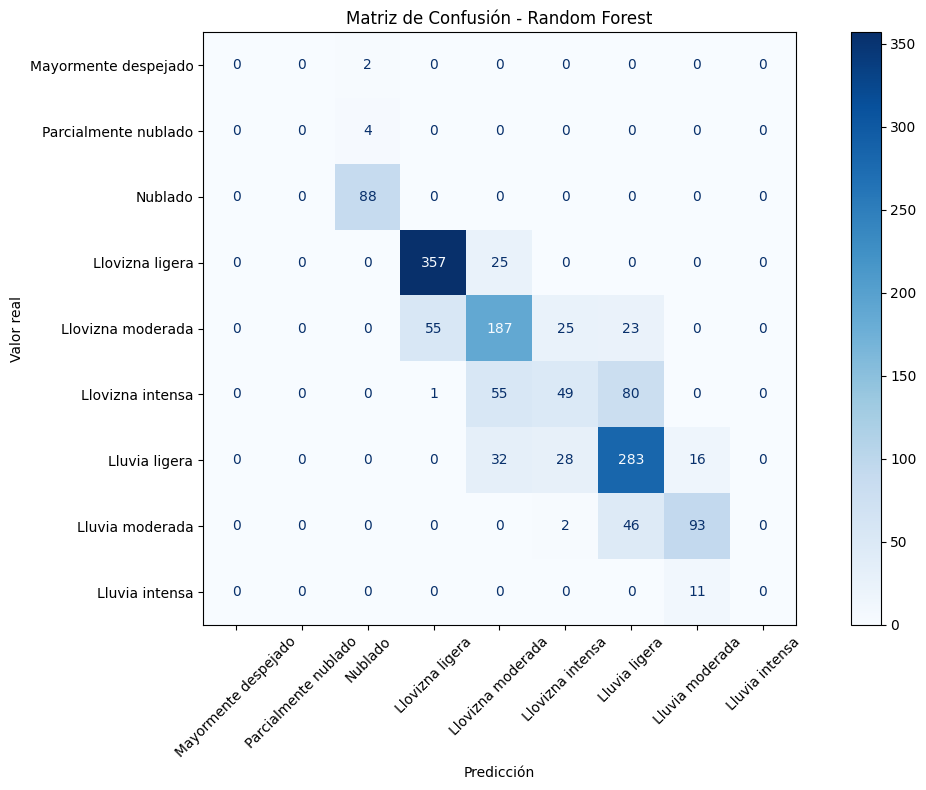

In [ ]:
# Creamos la matriz de confusión
labels_codes = np.sort(y.unique())
labels_names = [Feature_weather_code.get(code, f"Code {code}") for code in labels_codes]
conf_matrix = confusion_matrix(y_test, y_pred, labels=labels_codes)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=labels_names)
fig, ax = plt.subplots(figsize=(12, 8))
disp.plot(ax=ax, cmap="Blues", xticks_rotation=45)
plt.title("Matriz de Confusión - Random Forest")
plt.xlabel("Predicción")
plt.ylabel("Valor real")
plt.tight_layout()
plt.show()

<ipython-input-264-279540006>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=forest_importances, y=forest_importances.index, palette='viridis')


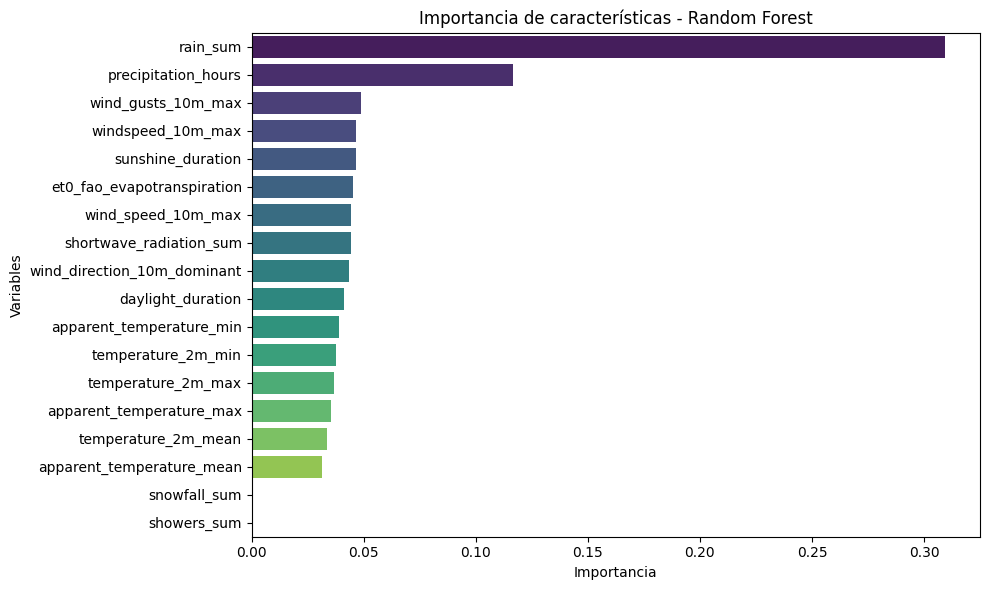

In [ ]:
# Veamos la importancia de características
importances = clf.feature_importances_
feature_names = X.columns
forest_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=forest_importances, y=forest_importances.index, palette='viridis')
plt.title("Importancia de características - Random Forest")
plt.xlabel("Importancia")
plt.ylabel("Variables")
plt.tight_layout()
plt.show()

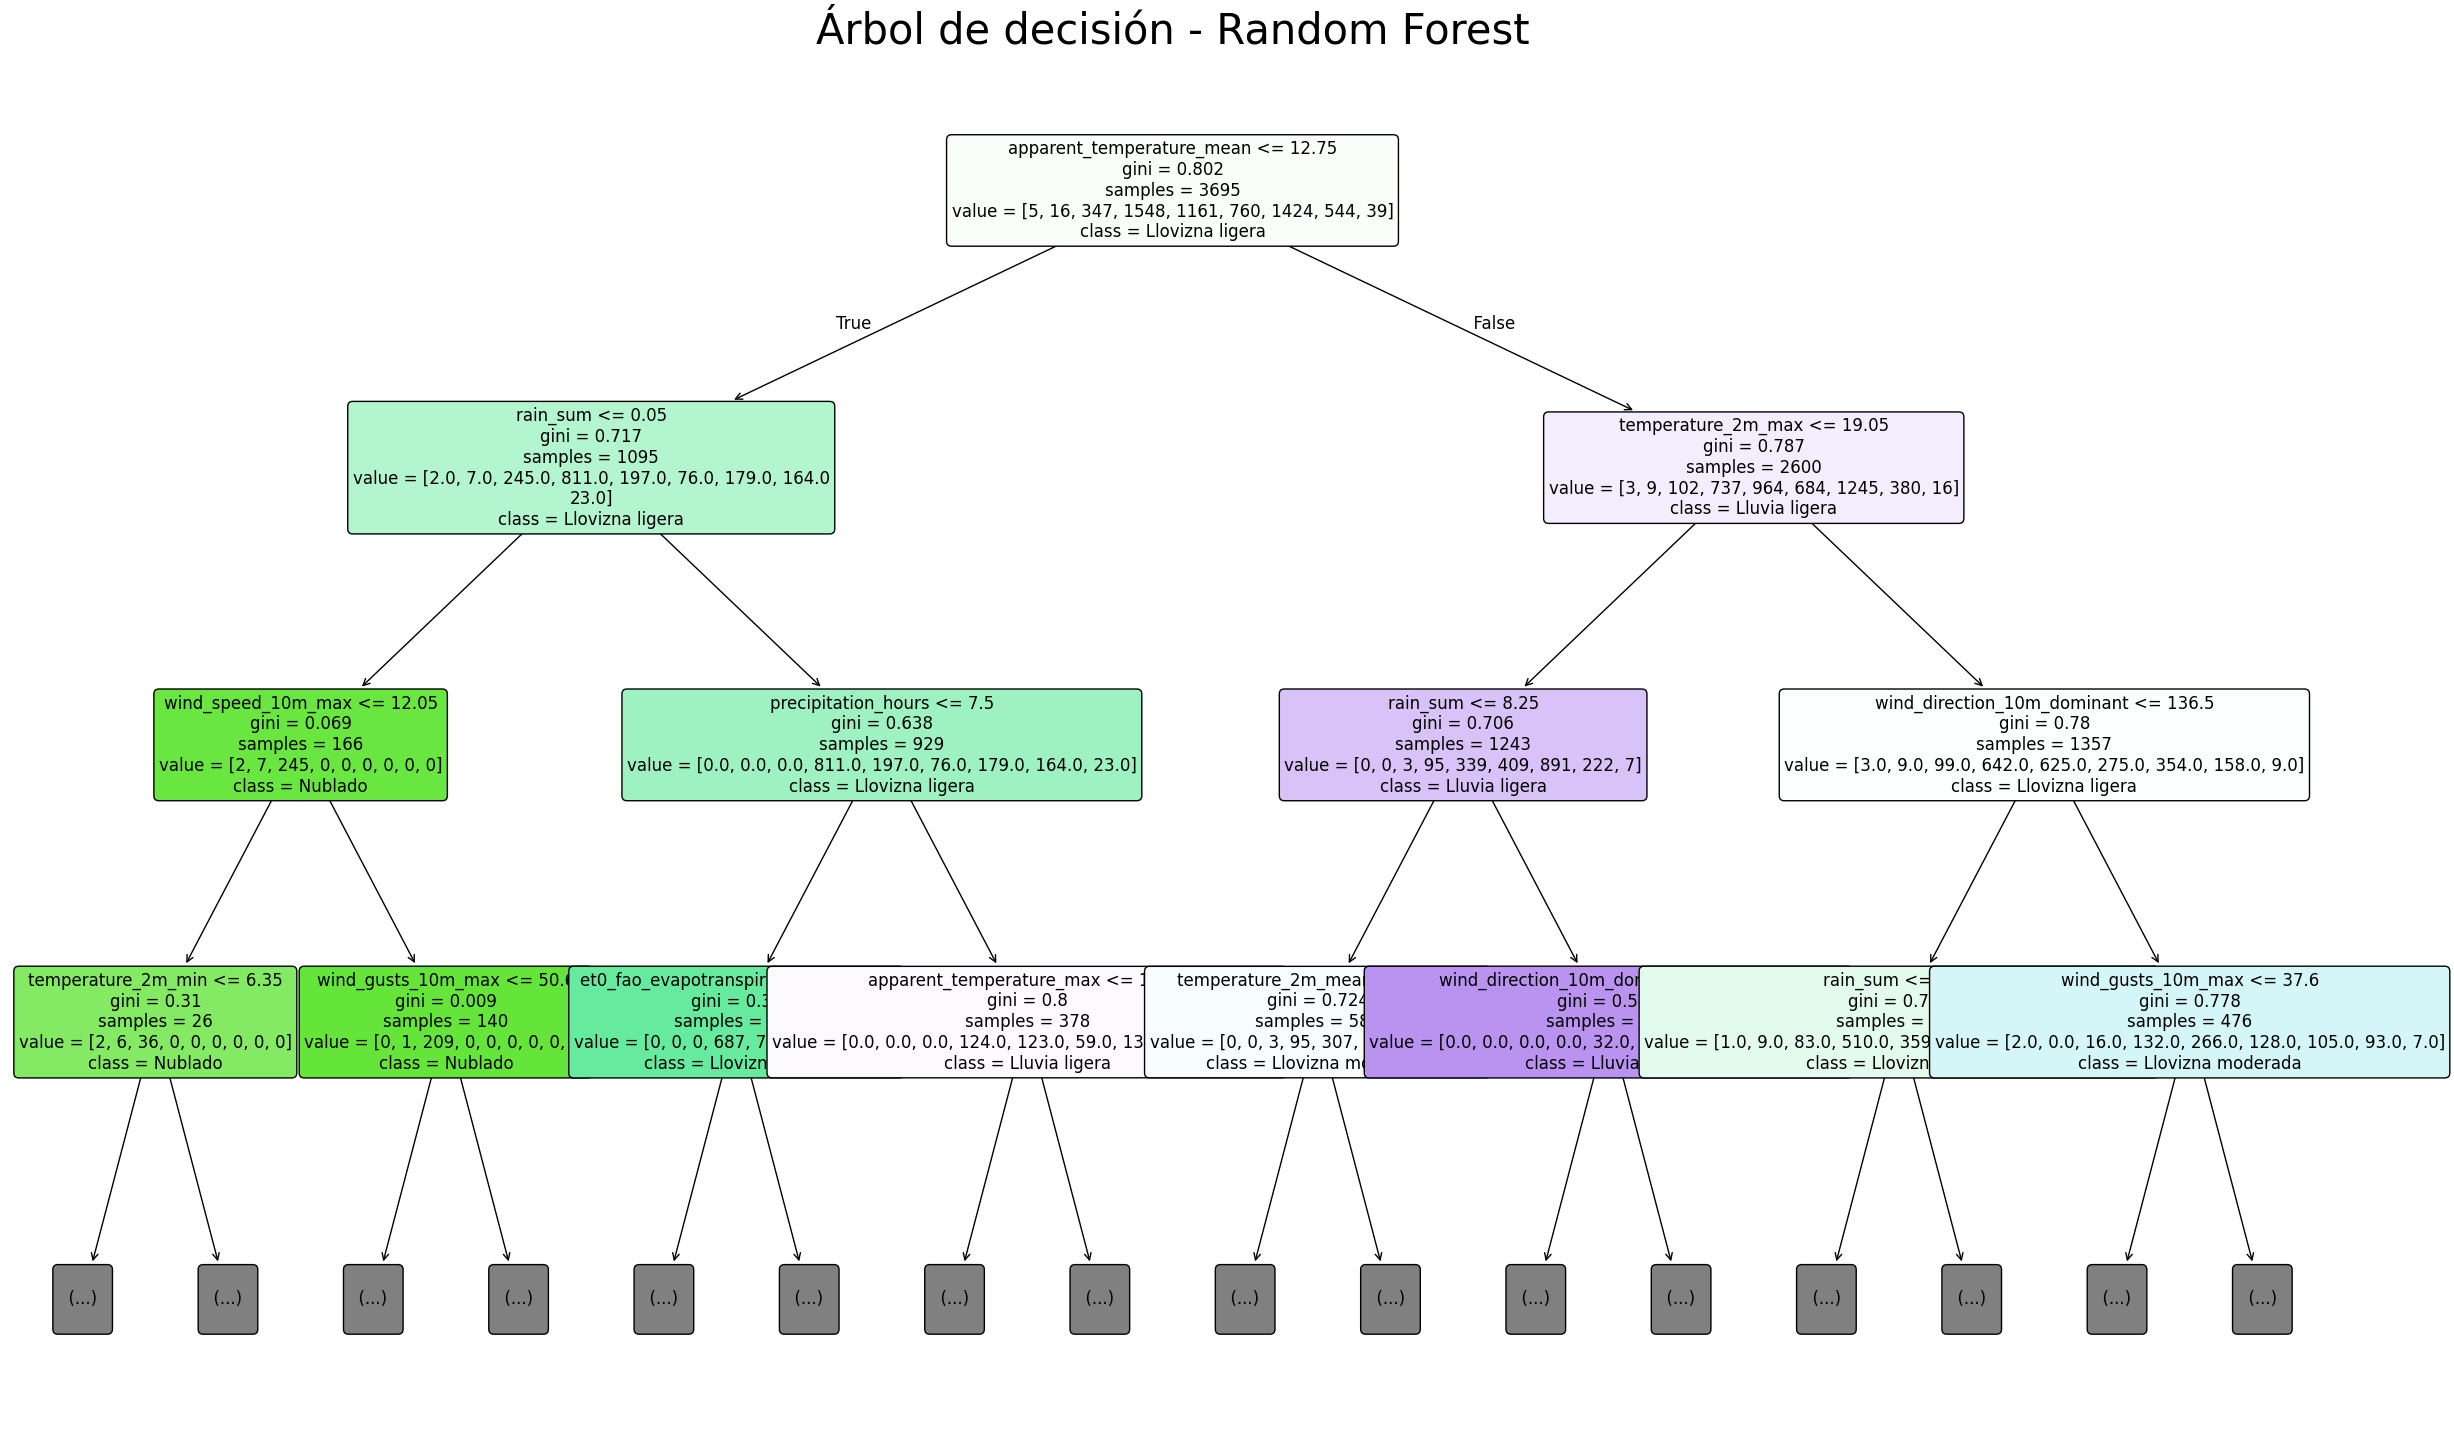

In [ ]:
# Árbol de decisión
one_tree = clf.estimators_[0]
plt.figure(figsize=(30, 18))
plot_tree(
    one_tree,
    feature_names=X.columns,
    class_names=[Feature_weather_code.get(c, str(c)) for c in np.sort(y.unique())],
    filled=True,
    rounded=True,
    max_depth=3,
    fontsize=12
)
plt.title("Árbol de decisión - Random Forest", fontsize=30)
plt.show()

* Miremos qué ocurre cuando quitamos del *data frame* las variables que están fuertemente correlacionados con *weather_code*, que en este caso son: *rain_sum* y *precipitation_hours*.

In [ ]:
# Creamos una copia de df_RF para eliminar rain_sum y precipitation_hours
df_RF_new = df_RF.copy()
df_RF_new = df_RF_new.drop(columns=['rain_sum', 'precipitation_hours'])

In [ ]:
# Veamos la información del dataFrame
df_RF_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7306 entries, 0 to 7305
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   temperature_2m_max           7306 non-null   float64
 1   temperature_2m_mean          7306 non-null   float64
 2   temperature_2m_min           7306 non-null   float64
 3   apparent_temperature_max     7306 non-null   float64
 4   apparent_temperature_mean    7306 non-null   float64
 5   apparent_temperature_min     7306 non-null   float64
 6   weather_code                 7306 non-null   int64  
 7   showers_sum                  7306 non-null   float64
 8   snowfall_sum                 7306 non-null   float64
 9   sunshine_duration            7306 non-null   float64
 10  daylight_duration            7306 non-null   float64
 11  wind_speed_10m_max           7306 non-null   float64
 12  wind_gusts_10m_max           7306 non-null   float64
 13  windspeed_10m_max 

In [ ]:
# Definimos variables predictoras (X) y variable objetivo (y)
X = df_RF_new.drop(columns=['weather_code'])
y = df_RF_new['weather_code']

# Dividimos en train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Entrenamos el modelo de clasificación
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predecimos
y_pred = clf.predict(X_test)

# Evaluamos
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         4
           3       0.66      0.33      0.44        88
          51       0.56      0.82      0.67       382
          53       0.43      0.39      0.41       290
          55       0.37      0.18      0.25       185
          61       0.53      0.61      0.56       359
          63       0.49      0.35      0.41       141
          65       0.00      0.00      0.00        11

    accuracy                           0.52      1462
   macro avg       0.34      0.30      0.30      1462
weighted avg       0.50      0.52      0.49      1462



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


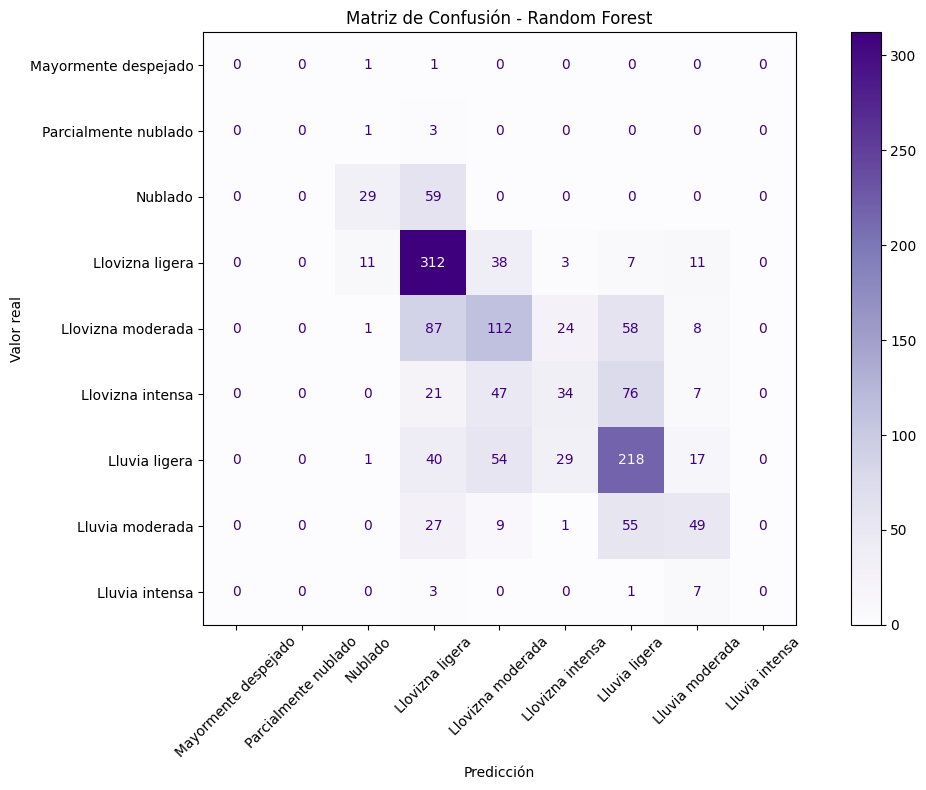

In [ ]:
# Creamos la matriz de confusión
labels_codes = np.sort(y.unique())
labels_names = [Feature_weather_code.get(code, f"Code {code}") for code in labels_codes]
conf_matrix = confusion_matrix(y_test, y_pred, labels=labels_codes)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=labels_names)
fig, ax = plt.subplots(figsize=(12, 8))
disp.plot(ax=ax, cmap="Purples", xticks_rotation=45)
plt.title("Matriz de Confusión - Random Forest")
plt.xlabel("Predicción")
plt.ylabel("Valor real")
plt.tight_layout()
plt.show()

<ipython-input-270-2941895089>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=forest_importances, y=forest_importances.index, palette='viridis')


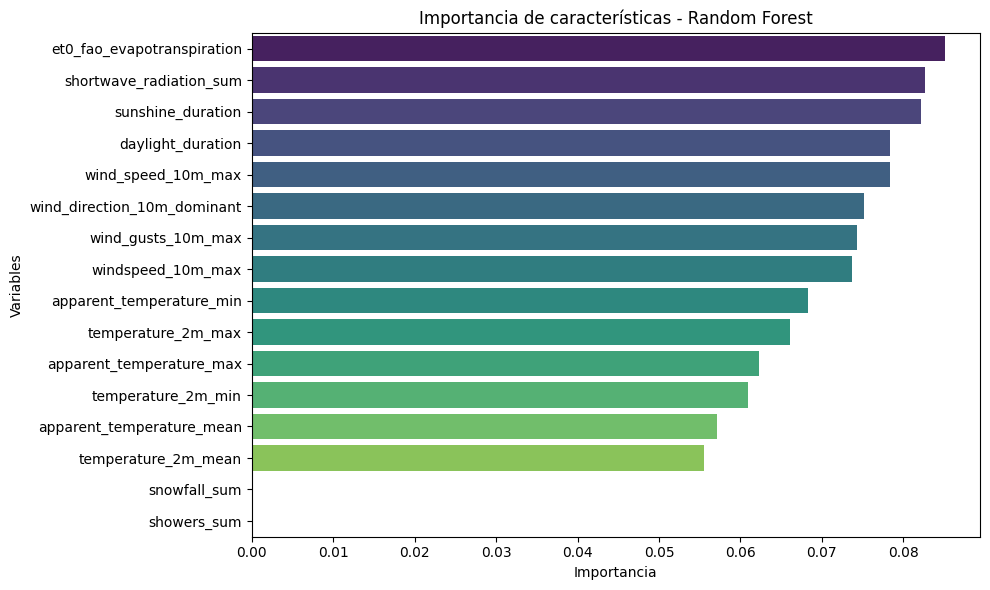

In [ ]:
# Importancia de características
importances = clf.feature_importances_
feature_names = X.columns
forest_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=forest_importances, y=forest_importances.index, palette='viridis')
plt.title("Importancia de características - Random Forest")
plt.xlabel("Importancia")
plt.ylabel("Variables")
plt.tight_layout()
plt.show()

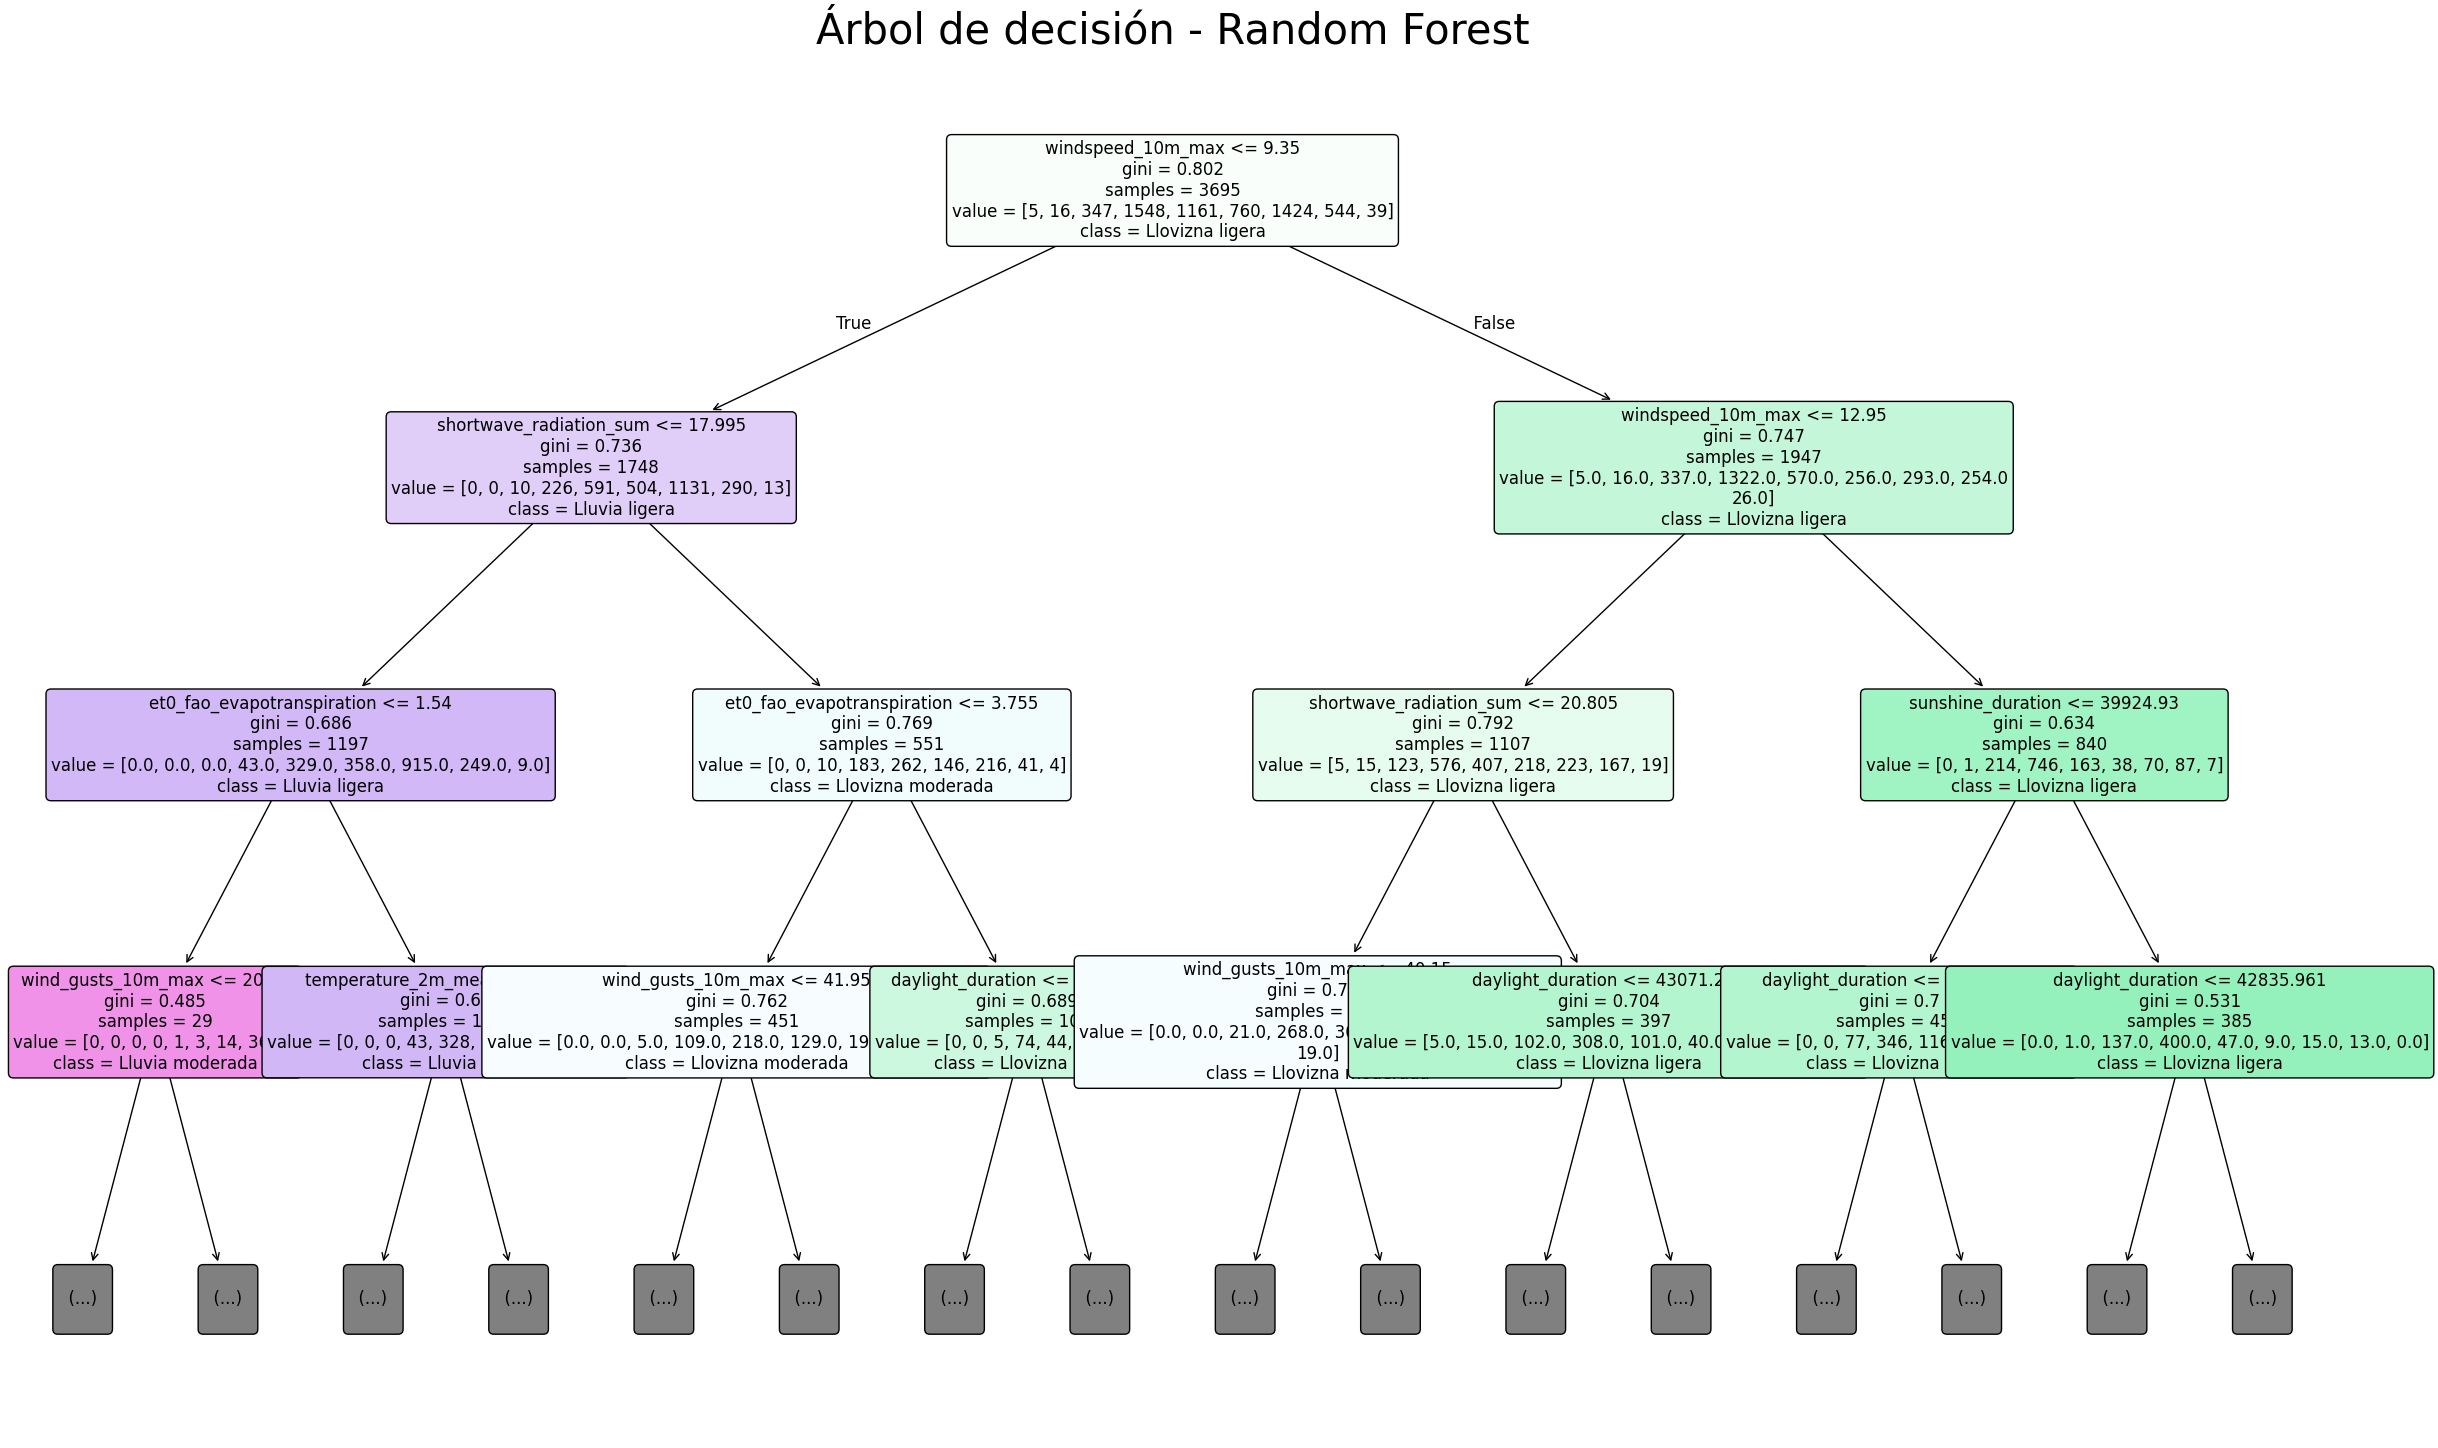

In [ ]:
# Árbol de decisión
one_tree = clf.estimators_[0]
plt.figure(figsize=(30, 18))
plot_tree(
    one_tree,
    feature_names=X.columns,
    class_names=[Feature_weather_code.get(c, str(c)) for c in np.sort(y.unique())],
    filled=True,
    rounded=True,
    max_depth=3,
    fontsize=12
)
plt.title("Árbol de decisión - Random Forest", fontsize=30)
plt.show()

## ✅<font color='blue'>**4. Neural Networks**</font>

In [ ]:
# Quitamos time y precipitation_sum que es la suma de las precipitaciones diarias (incluidas lluvias, chubascos y nevadas)
df_NN = df_new.copy()
df_NN = df_NN.drop(columns=['time', 'precipitation_sum'])

In [ ]:
# Creamos variables predictoras (X) y la variable objetivo (y)
X = df_NN.drop(columns=["weather_code"])
y = df_NN["weather_code"]

# Dividimos Train/Test
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Escalamos las entradas
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Codificamos la la salida
classes = np.sort(y.unique())
class_to_index = {label: idx for idx, label in enumerate(classes)}
y_train_encoded = to_categorical(y_train.map(class_to_index))
y_test_encoded = to_categorical(y_test.map(class_to_index))

In [ ]:
# Modelo de red neuronal
model_NN = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(len(classes), activation='softmax')  # Clasificación multiclase
])

model_NN.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Veamos el número de capas del modelo
model_NN.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_36 (Dense)                │ (None, 64)             │         1,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 9)              │           297 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,593 (14.04 KB)

 Trainable params: 3,593 (14.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Entrenamiento
history = model_NN.fit(X_train_scaled, y_train_encoded, epochs=30, batch_size=32, validation_split=0.2)

Epoch 1/30
147/147 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.4021 - loss: 1.7101 - val_accuracy: 0.5672 - val_loss: 1.1676
Epoch 2/30
147/147 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5648 - loss: 1.1209 - val_accuracy: 0.5911 - val_loss: 1.0151
Epoch 3/30
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6144 - loss: 0.9904 - val_accuracy: 0.6356 - val_loss: 0.9220
Epoch 4/30
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6336 - loss: 0.9094 - val_accuracy: 0.6724 - val_loss: 0.8440
Epoch 5/30
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6683 - loss: 0.8309 - val_accuracy: 0.6784 - val_loss: 0.8105
Epoch 6/30
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6846 - loss: 0.7902 - val_accuracy: 0.6946 - val_loss: 0.7689
Epoch 7/30
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6941 - loss: 0.7438 - val_accuracy: 0.7032 - val_loss: 0.7410
Epoch 8/30
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6970 - loss: 0.7264 - val_accuracy: 0

In [ ]:
# Evaluamos el modelo
test_loss, test_acc = model_NN.evaluate(X_test_scaled, y_test_encoded)
print(f"Test accuracy: {test_acc:.2f}")

# Predicciones
y_pred_probs = model_NN.predict(X_test_scaled)
y_pred = classes[np.argmax(y_pred_probs, axis=1)]

# Reporte de clasificación
print(classification_report(y_test, y_pred))

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7293 - loss: 0.5928
Test accuracy: 0.73
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         4
           3       0.77      0.98      0.86        88
          51       0.86      0.91      0.88       382
          53       0.71      0.66      0.69       290
          55       0.46      0.42      0.44       185
          61       0.71      0.74      0.72       359
          63       0.75      0.70      0.73       141
          65       0.50      0.09      0.15        11

    accuracy                           0.73      1462
   macro avg       0.53      0.50      0.50      1462
weighted avg       0.72      0.73      0.72      1462



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Veamos la evolución del entrenamiento
df_NN=pd.DataFrame(history.history)
df_NN.head()

,accuracy,loss,val_accuracy,val_loss
0,0.475508,1.465421,0.567151,1.167580
1,0.579679,1.089246,0.591103,1.015110
2,0.618396,0.973430,0.635586,0.922015
3,0.646203,0.888457,0.672370,0.843953
4,0.663102,0.822757,0.678358,0.810462


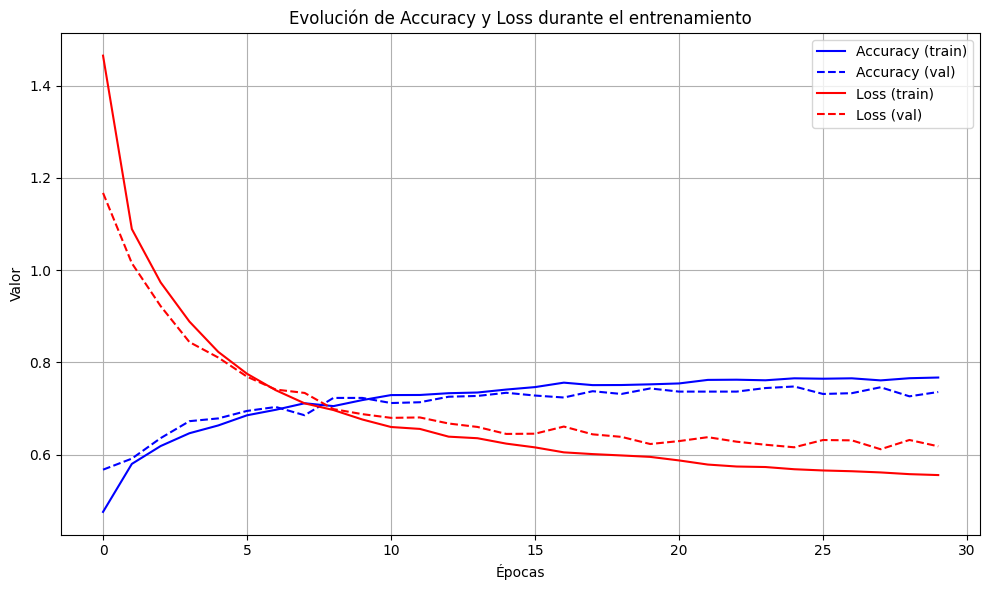

In [ ]:
# Grafica de evolución de Accuracy y Loss durante el entrenamiento
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.figure(figsize=(10, 6))

# Accuracy
plt.plot(epochs, acc, label='Accuracy (train)', color='blue')
plt.plot(epochs, val_acc, label='Accuracy (val)', color='blue', linestyle='--')

# Loss
plt.plot(epochs, loss, label='Loss (train)', color='red')
plt.plot(epochs, val_loss, label='Loss (val)', color='red', linestyle='--')

plt.title('Evolución de Accuracy y Loss durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

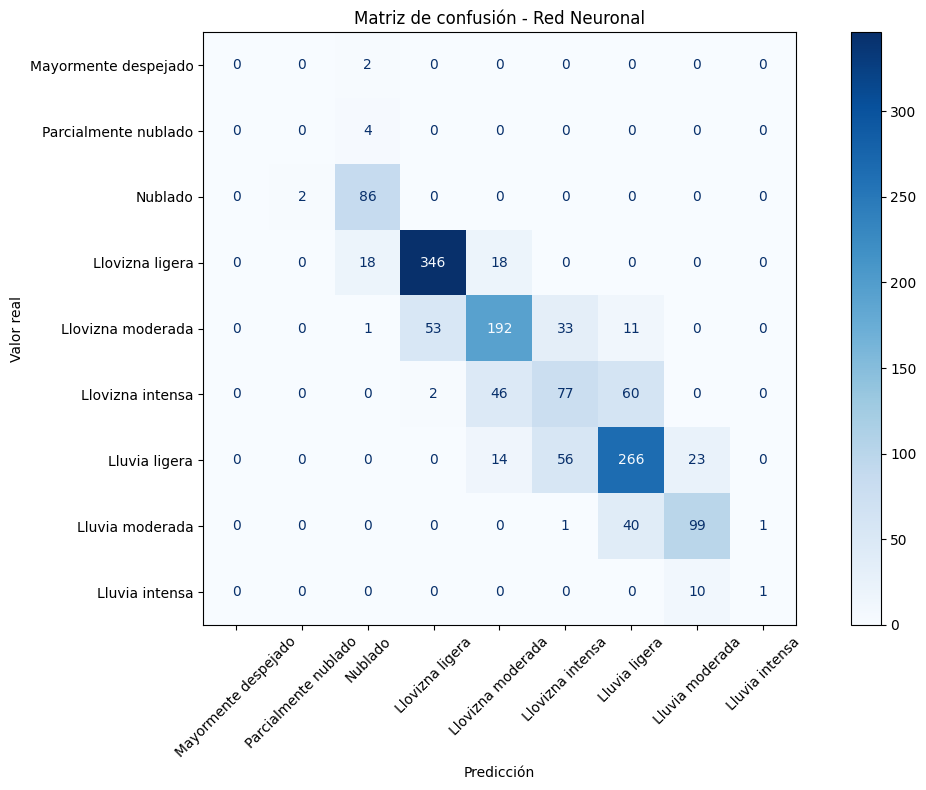

In [ ]:
# Matriz de confusión
cm = confusion_matrix(y_test, y_pred, labels=classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[Feature_weather_code.get(c, str(c)) for c in classes])
fig, ax = plt.subplots(figsize=(12, 8))
disp.plot(ax=ax, xticks_rotation=45, cmap="Blues")
plt.title("Matriz de confusión - Red Neuronal")
plt.xlabel("Predicción")
plt.ylabel("Valor real")
plt.tight_layout()
plt.show()

* De forma análoga al caso de Random Forest, miremos qué ocurre cuando quitamos del *data frame* las variables que están fuertemente correlacionadas con *weather_code*

In [ ]:
# Quitamos rain_sum y precipitation_hours que indican si llovió y cuánto tiempo llovió
df_NN_new = df_new.copy()
df_NN_new = df_NN_new.drop(columns=['time', 'precipitation_sum', 'rain_sum', 'precipitation_hours'])

In [ ]:
# Veamos la información del dataFrame
df_NN_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7306 entries, 0 to 7305
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   temperature_2m_max           7306 non-null   float64
 1   temperature_2m_mean          7306 non-null   float64
 2   temperature_2m_min           7306 non-null   float64
 3   apparent_temperature_max     7306 non-null   float64
 4   apparent_temperature_mean    7306 non-null   float64
 5   apparent_temperature_min     7306 non-null   float64
 6   weather_code                 7306 non-null   int64  
 7   showers_sum                  7306 non-null   float64
 8   snowfall_sum                 7306 non-null   float64
 9   sunshine_duration            7306 non-null   float64
 10  daylight_duration            7306 non-null   float64
 11  wind_speed_10m_max           7306 non-null   float64
 12  wind_gusts_10m_max           7306 non-null   float64
 13  windspeed_10m_max 

In [ ]:
# Definimos variables predictoras (X) y la variable objetivo (y)
X = df_NN_new.drop(columns=["weather_code"])
y = df_NN_new["weather_code"]

# Dividimos Train/Test
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Escalamos entradas
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Codificamos la salida
from tensorflow.keras.utils import to_categorical
classes = np.sort(y.unique())
class_to_index = {label: idx for idx, label in enumerate(classes)}
y_train_encoded = to_categorical(y_train.map(class_to_index))
y_test_encoded = to_categorical(y_test.map(class_to_index))

In [ ]:
# Modelo de red neuronal
model_NN_new = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(len(classes), activation='softmax')  # Clasificación multiclase
])

model_NN_new.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Veamos el número de capas del modelo
model_NN_new.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_39 (Dense)                │ (None, 64)             │         1,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 9)              │           297 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,465 (13.54 KB)

 Trainable params: 3,465 (13.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Entrenamiento
history = model_NN_new.fit(X_train_scaled, y_train_encoded, epochs=30, batch_size=32, validation_split=0.2)

Epoch 1/30
147/147 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.3635 - loss: 1.8274 - val_accuracy: 0.4867 - val_loss: 1.3414
Epoch 2/30
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4938 - loss: 1.3208 - val_accuracy: 0.5021 - val_loss: 1.2707
Epoch 3/30
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5094 - loss: 1.2457 - val_accuracy: 0.5158 - val_loss: 1.2300
Epoch 4/30
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5213 - loss: 1.2131 - val_accuracy: 0.5192 - val_loss: 1.2124
Epoch 5/30
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5365 - loss: 1.1914 - val_accuracy: 0.5056 - val_loss: 1.2084
Epoch 6/30
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5361 - loss: 1.1718 - val_accuracy: 0.5141 - val_loss: 1.1847
Epoch 7/30
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5429 - loss: 1.1653 - val_accuracy: 0.5141 - val_loss: 1.1803
Epoch 8/30
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5341 - loss: 1.1637 - val_accuracy: 0.

In [ ]:
# Evaluamos el modelo
test_loss, test_acc = model_NN_new.evaluate(X_test_scaled, y_test_encoded)
print(f"Test accuracy: {test_acc:.2f}")

# Predicciones
y_pred_probs = model_NN_new.predict(X_test_scaled)
y_pred = classes[np.argmax(y_pred_probs, axis=1)]

# Reporte de clasificación
print(classification_report(y_test, y_pred))

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5188 - loss: 1.1433
Test accuracy: 0.52
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         4
           3       0.71      0.25      0.37        88
          51       0.58      0.84      0.68       382
          53       0.42      0.36      0.39       290
          55       0.35      0.19      0.25       185
          61       0.54      0.67      0.59       359
          63       0.55      0.34      0.42       141
          65       0.00      0.00      0.00        11

    accuracy                           0.52      1462
   macro avg       0.35      0.29      0.30      1462
weighted avg       0.51      0.52      0.50      1462



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Veamos la evolución del entrenamiento
df_NN_new=pd.DataFrame(history.history)
df_NN.head()

,accuracy,loss,val_accuracy,val_loss
0,0.475508,1.465421,0.567151,1.167580
1,0.579679,1.089246,0.591103,1.015110
2,0.618396,0.973430,0.635586,0.922015
3,0.646203,0.888457,0.672370,0.843953
4,0.663102,0.822757,0.678358,0.810462


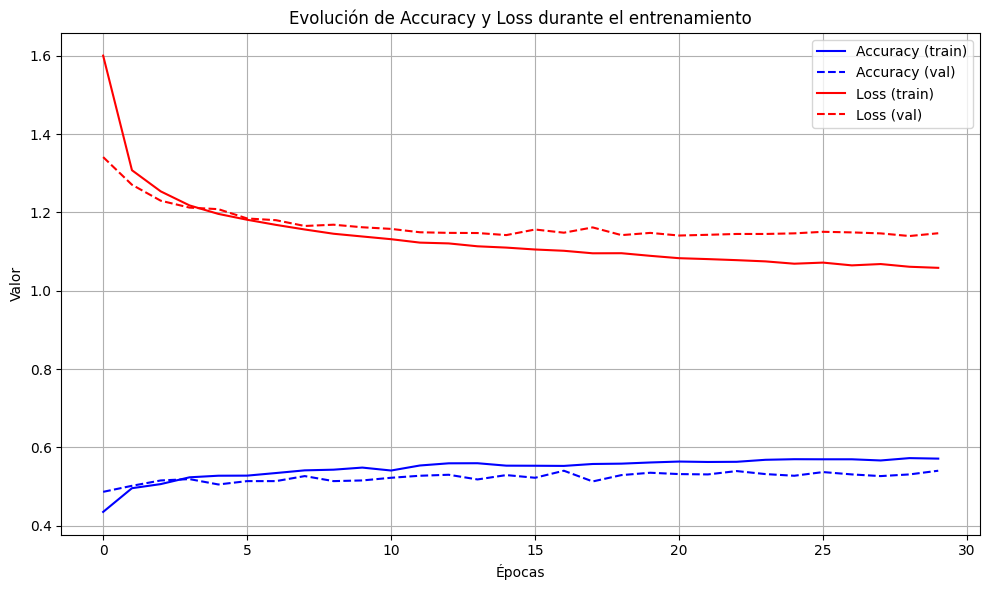

In [ ]:
# Grafica de evolución de Accuracy y Loss durante el entrenamiento
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.figure(figsize=(10, 6))

# Accuracy
plt.plot(epochs, acc, label='Accuracy (train)', color='blue')
plt.plot(epochs, val_acc, label='Accuracy (val)', color='blue', linestyle='--')

# Loss
plt.plot(epochs, loss, label='Loss (train)', color='red')
plt.plot(epochs, val_loss, label='Loss (val)', color='red', linestyle='--')

plt.title('Evolución de Accuracy y Loss durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

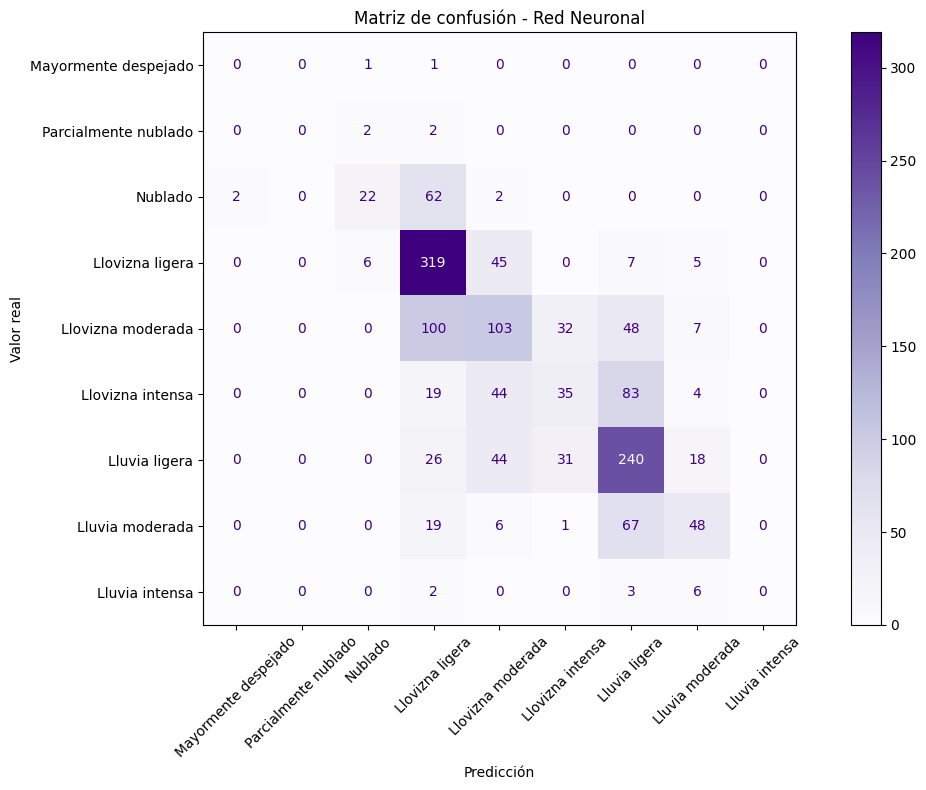

In [ ]:
# Matriz de confusión
cm = confusion_matrix(y_test, y_pred, labels=classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[Feature_weather_code.get(c, str(c)) for c in classes])
fig, ax = plt.subplots(figsize=(12, 8))
disp.plot(ax=ax, xticks_rotation=45, cmap="Purples")
plt.title("Matriz de confusión - Red Neuronal")
plt.xlabel("Predicción")
plt.ylabel("Valor real")
plt.tight_layout()
plt.show()

## **🙋 5. ¿Y si quiero predecir el día en que ocurrirá un cierto weather_code?**

Para este caso, debemos tener en cuenta que el modelo no puede otorgar una fecha exacta como salida. Así que haremos lo contrario. Vamos a predecir en qué fechas es probable que ocurra cierto tipo de clima, tomaremos como ejemplo, weather_code == 61 que corresponde a "lluvia ligera".

Dado que hasta este punto, los modelos han predicho mejor cuando tenemos *rain_sum* y *precipitations_hours*, aquí se tomaran los datos completos, es decir, sin quitar *rain_sum* y *precipitations_hours*.

Veamos qué ocurre con cada modelo:

## ✅✅<font color='green'>**Random Forests**</font>

In [ ]:
# Creamos un nuevo data frame a partir de df_new
df_RF_time = df_new.copy()

# Creamos una variable binaria: 1 si es lluvia ligera, 0 si no hay lluvia.
df_RF_time['rain_day'] = (df_RF_time['weather_code'] == 61).astype(int)

# Extraemos las características de la fecha
df_RF_time['day_of_year'] = df_RF_time['time'].dt.dayofyear     # Día del año del 1 al 365 (o 366)
df_RF_time['month'] = df_RF_time['time'].dt.month               # Número del mes de 1 al 12
df_RF_time['week'] = df_RF_time['time'].dt.isocalendar().week   # Semana del año
df_RF_time['weekday'] = df_RF_time['time'].dt.weekday           # Día de la semana (0 a 6, donde 0 = lunes, 6 = domingo)

# Definimos predictores y objetivo
X = df_RF_time.drop(columns=["time", "weather_code", "rain_day"])
y = df_RF_time["rain_day"]

# Escalamos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# División de datos train/test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Entrenamos el modelo
model_RF_time = RandomForestClassifier(n_estimators=100, random_state=42)
model_RF_time.fit(X_train, y_train)

# Evaluamos el modelo
y_pred = model_RF_time.predict(X_test)
print(classification_report(y_test, y_pred))

# Predicción sobre todos los datos para encontrar días de lluvia
df_RF_time["pred_lluvia"] = model_RF_time.predict(X_scaled)

# Mostrar fechas donde el modelo predice lluvia
fechas_lluvia = df_RF_time[df_RF_time["pred_lluvia"] == 1]["time"]
print("Fechas donde se predice lluvia:")
print(fechas_lluvia)

              precision    recall  f1-score   support

           0       0.89      0.92      0.91      1089
           1       0.76      0.68      0.71       373

    accuracy                           0.86      1462
   macro avg       0.82      0.80      0.81      1462
weighted avg       0.86      0.86      0.86      1462

Fechas donde se predice lluvia:
2      2005-01-03
13     2005-01-14
16     2005-01-17
21     2005-01-22
23     2005-01-24
          ...    
7274   2024-12-01
7288   2024-12-15
7300   2024-12-27
7302   2024-12-29
7303   2024-12-30
Name: time, Length: 1758, dtype: datetime64[ns]


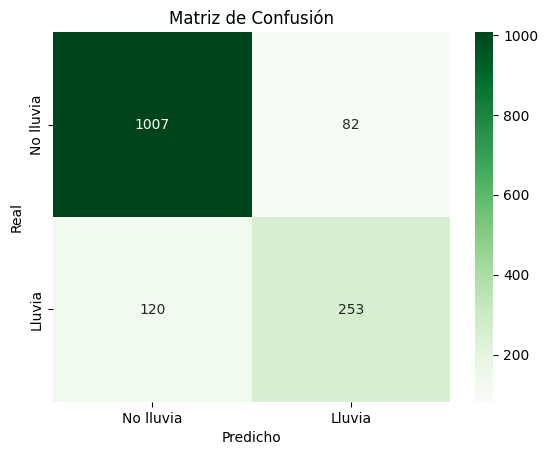

In [ ]:
# Matriz de confusión
labels = ["No lluvia", "Lluvia ligera"]
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=["No lluvia", "Lluvia"], yticklabels=["No lluvia", "Lluvia"])
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.show()

<ipython-input-293-3049658327>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df_RF_time, x="Importance", y="Feature", palette="viridis")


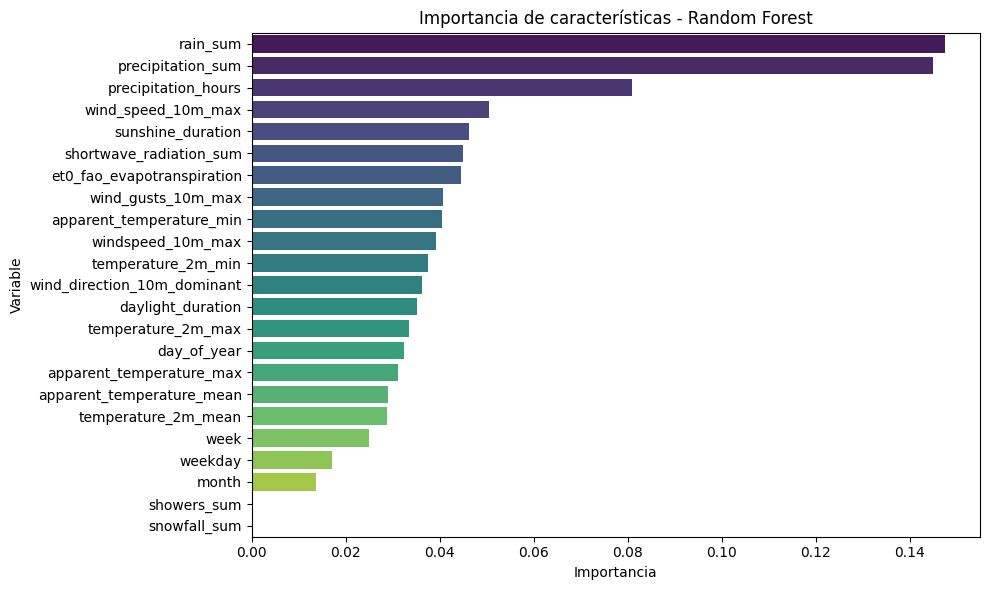

In [ ]:
# Importancia de características
importances = model_RF_time.feature_importances_
features = X.columns
importance_df_RF_time = pd.DataFrame({"Feature": features, "Importance": importances})
importance_df_RF_time = importance_df_RF_time.sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(data=importance_df_RF_time, x="Importance", y="Feature", palette="viridis")
plt.title("Importancia de características - Random Forest")
plt.xlabel("Importancia")
plt.ylabel("Variable")
plt.tight_layout()
plt.show()

## ✅✅<font color='green'>**Neural Networks**</font>

In [ ]:
!pip install tensorflow scikit-learn matplotlib seaborn

In [ ]:
# Creamos un nuevo data frame a partir de  df_new
df_NN_time = df_new.copy()

# Indicamos si ese día hubo lluvia ligera (weather_code == 61) o no
df_NN_time['rain_day'] = (df_NN_time['weather_code'] == 61).astype(int)

# Extraemos las características de la fecha
df_NN_time['day_of_year'] = df_NN_time['time'].dt.dayofyear
df_NN_time['month'] = df_NN_time['time'].dt.month
df_NN_time['week'] = df_NN_time['time'].dt.isocalendar().week
df_NN_time['weekday'] = df_NN_time['time'].dt.weekday

# Creamos variables predictoras (X) y la variable objetivo (y)
X = df_NN_time.drop(columns=["time", "weather_code", "rain_day"])
y = df_NN_time["rain_day"]

# Escalamos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividimos train/test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Modelo de red neuronal
model_NN_time = Sequential()
model_NN_time.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model_NN_time.add(Dropout(0.3))                     # capa de regularización
model_NN_time.add(Dense(32, activation='relu'))
model_NN_time.add(Dense(1, activation='sigmoid'))  # Salida binaria

model_NN_time.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Veamos el número de capas del modelo
model_NN_time.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_42 (Dense)                │ (None, 64)             │         1,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,649 (14.25 KB)

 Trainable params: 3,649 (14.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Entrenamos el modelo
history = model_NN_time.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/30
147/147 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7565 - loss: 0.4778 - val_accuracy: 0.8263 - val_loss: 0.3842
Epoch 2/30
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7968 - loss: 0.4160 - val_accuracy: 0.8358 - val_loss: 0.3591
Epoch 3/30
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8096 - loss: 0.3920 - val_accuracy: 0.8435 - val_loss: 0.3417
Epoch 4/30
147/147 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8369 - loss: 0.3560 - val_accuracy: 0.8529 - val_loss: 0.3266
Epoch 5/30
147/147 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.8434 - loss: 0.3487 - val_accuracy: 0.8563 - val_loss: 0.3171
Epoch 6/30
147/147 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8521 - loss: 0.3325 - val_accuracy: 0.8597 - val_loss: 0.3059
Epoch 7/30
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8524 - loss: 0.3146 - val_accuracy: 0.8657 - val_loss: 0.2970
Epoch 8/30
147/147 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8428 - loss: 0.3280 - val_accuracy: 0

In [ ]:
# Evaluamos el modelo
y_pred_probs = model_NN_time.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int)

# Reporte de clasificación
print(classification_report(y_test, y_pred))

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

           0       0.92      0.91      0.91      1089
           1       0.75      0.76      0.75       373

    accuracy                           0.87      1462
   macro avg       0.83      0.84      0.83      1462
weighted avg       0.87      0.87      0.87      1462



In [ ]:
# Veamos la evolución del entrenamiento
df_NN=pd.DataFrame(history.history)
df_NN.head()

,accuracy,loss,val_accuracy,val_loss
0,0.768128,0.451996,0.826347,0.384177
1,0.806631,0.401459,0.835757,0.359143
2,0.820321,0.380557,0.843456,0.341740
3,0.834225,0.358811,0.852866,0.326635
4,0.842139,0.344445,0.856287,0.317126


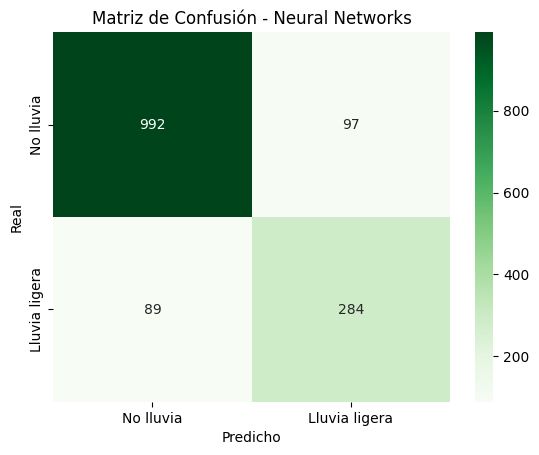

In [ ]:
# Matriz de confusión
labels = ["No lluvia", "Lluvia ligera"]
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.title("Matriz de Confusión - Neural Networks")
plt.show()

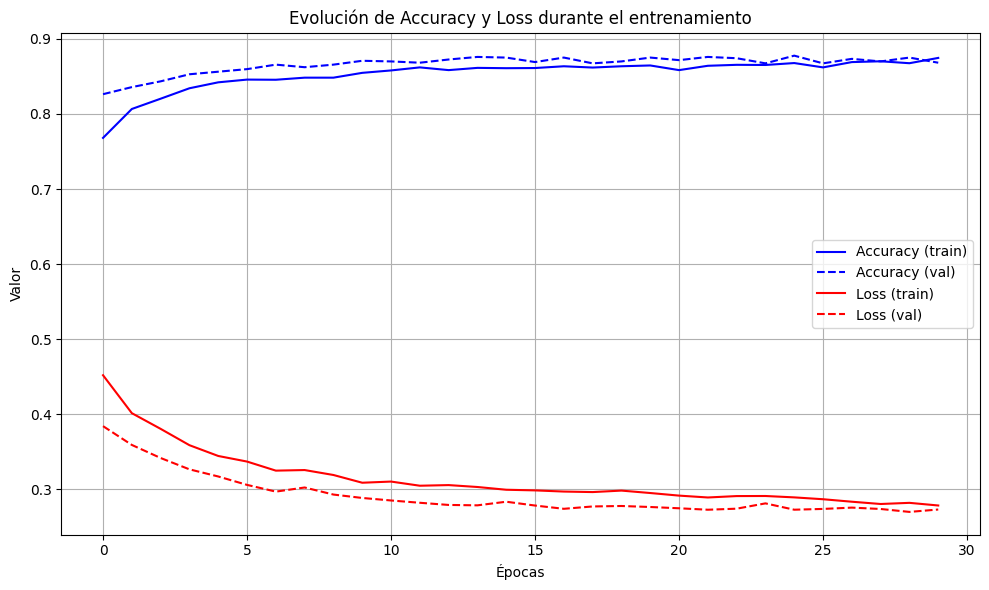

In [ ]:
# Grafica de evolución de Accuracy y Loss durante el entrenamiento
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.figure(figsize=(10, 6))

# Accuracy
plt.plot(epochs, acc, label='Accuracy (train)', color='blue')
plt.plot(epochs, val_acc, label='Accuracy (val)', color='blue', linestyle='--')

# Loss
plt.plot(epochs, loss, label='Loss (train)', color='red')
plt.plot(epochs, val_loss, label='Loss (val)', color='red', linestyle='--')

plt.title('Evolución de Accuracy y Loss durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()